# 課程目標:
    了解Keras 內建dataset 如何使用
    

# 範例重點

   使用CIFAR10 練習如何分類, 架構網路層
    
   如何對數據及進行查詢

# 導入必要的程式庫

In [0]:
from keras.datasets import cifar10
import numpy as np
import math
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [0]:
# 從網路即時下載CIFAR10⼩圖像，數據集涵蓋50,000張32x32彩⾊色訓練圖像及10,000張測試圖像，並且標註超過10個類別
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

# 查詢檔案維度資訊
print(f"Shape of x_img_train: {x_img_train.shape}")
print(f"Shape of y_label_train: {y_label_train.shape}")
print(f"Shape of x_img_test: {x_img_test.shape}")
print(f"Shape of y_label_test: {y_label_test.shape}")

Shape of x_img_train: (50000, 32, 32, 3)
Shape of y_label_train: (50000, 1)
Shape of x_img_test: (10000, 32, 32, 3)
Shape of y_label_test: (10000, 1)


In [0]:
# 針對物件圖像數據集的類別編列成字典
label_list = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

label_dict = dict(zip(range(0, len(label_list)), label_list))

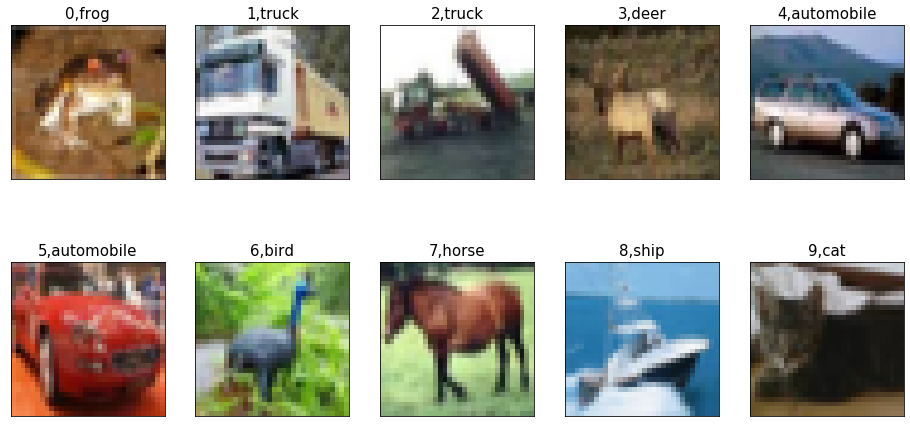

In [0]:
# 導入影像列印模組
import matplotlib.pyplot as plt

# 宣告一個影像標記的函數
def plot_images_labels_prediction(images, labels, prediction, idx, num):
    # 創造 rows x cols 的子圖
    cols = 5
    rows = math.ceil(num / cols)
    figure, ax = plt.subplots(rows, cols, figsize=(16,8))

    for i in range(0, num):
        # 鎖定子圖位置
        plt.subplot(rows, cols, 1+i)

        # 顯示 images 內第幾張圖片
        plt.imshow(images[idx])

        # 顯示 images 內第幾張圖片的標題        
        title = f"{i+1}.{label_dict[labels[idx][0]]}"
        idx += 1 

        # 待確認功能
        if len(prediction)>0:
            title += '=>'+label_dict[prediction[i]]

        # 一些畫圖設定  
        plt.title(title, fontsize=15) 
        plt.xticks([]); plt.yticks([])

#針對不同的影像作標記
plot_images_labels_prediction(x_img_train, y_label_train, [], idx=0, num=10)

# 影像正規化與OneHot Encoding

In [0]:
from keras.utils import np_utils

# 正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
print(f"Before normalized: shape = {x_img_train.shape} \nfirst pixle: {x_img_train[0][0][0]}")
print(f"After normalized: shape = {x_img_train_normalize.shape} \nfirst pixle: {x_img_train_normalize[0][0][0]}\n")

# OneHot Encoding
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
print(f"Before OneHot Encodeing: shape = {y_label_train.shape} \nfirst data: {y_label_train[0]}")
print(f"After OneHot Encodeing: shape = {y_label_train_OneHot.shape} \nfirst data: {y_label_train_OneHot[0]}")

Before normalized: shape = (50000, 32, 32, 3) 
first pixle: [59 62 63]
After normalized: shape = (50000, 32, 32, 3) 
first pixle: [0.23137255 0.24313726 0.24705882]

Before OneHot Encodeing: shape = (50000, 1) 
first data: [6]
After OneHot Encodeing: shape = (50000, 10) 
first data: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
